In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm

# <font face="gotham" color="purple"> Model Specification </font>

So far we have assumed correct **model specification**, if not correctly specified, we are encountering **model specification errors**. Here's the ideal criteria for specifying a model
1. Be able to make logical prediction.
2. Be consistent with theory.
3. Independent variables are uncorrelated with disturbance terms.
4. Parameter constancy.
5. Residuals should be white noise.


However, in practice, model specification errors are almost unavoidable, here are the list of how we might encounter specification errors.

1. Omission of a relevant variable(s).
2. Inclusion of an unnecessary variable(s).
3. Adoption of the wrong functional form.
4. Errors of measurement in data collection process.
5. Incorrect specification of the stochastic error term.
6. Assumption that the error term is normally distributed.

This chapter is exceedingly difficult in multiple independent variable case without linear algebra, we will simply scratch the surface of the topic. 

# <font face="gotham" color="purple"> Omission of A Relevant Variable </font>

Suppose the true relationship is
$$
Y_i = 3 + 4X_2 + 5X_3 + u_i
$$

However we estimate only $X_3$, i.e. the model with omission of $X_2$
$$
\hat{Y} = b_1+b_3X_3
$$

We will do $100000$ rounds of Monte Carlo simulation (might take some time, dial it down if necessary). 

In [95]:
n = 100
beta1, beta2, beta3 = 3, 4, 5
X2 = np.random.rand(n)
X3 = np.random.rand(n)
beta3_hat_list = []
for i in range(100000):
    
    u = np.random.randn(n)
    Y = beta1 + beta2*X2 + beta3*X3 + u
    df = pd.DataFrame(np.concatenate((Y[:, np.newaxis], X2[:, np.newaxis], X3[:, np.newaxis]), axis = 1), columns = ['Y', 'X2', 'X3'])

    X = df['X3']
    Y = df['Y']

    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    beta3_hat_list.append(model.params[1])

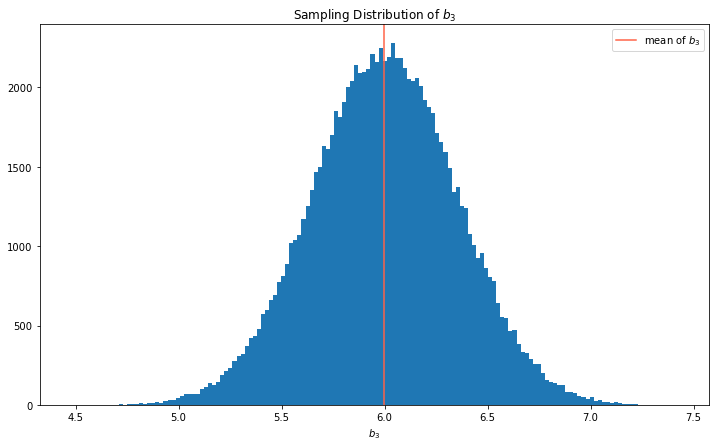

In [101]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.hist(beta3_hat_list, bins = 150)
ax.axvline(x = np.mean(beta3_hat_list), color = 'tomato', label = 'mean of $b_3$')
ax.set_xlabel('$b_3$')
ax.set_title('Sampling Distribution of $b_3$')
ax.legend()
plt.show()

In [97]:
print('The mean of b3 is {}.'.format(np.mean(beta3_hat_list)))

The mean of b3 is 5.998913199703797.


With $100000$ rounds of simulation, we could easily notice the sample distribution is biased, and mean of $b_3$ is far from true value $5$. We will demonstrate why this is the case without linear algebra.

We have shown in the second chapter, that estimator $b_3$ in a two-independent variable case is
$$
b_{3}=\frac{\operatorname{Cov}\left(X_{3}, Y\right) \operatorname{Var}\left(X_{2}\right)-\operatorname{Cov}\left(X_{2}, Y\right) \operatorname{Cov}\left(X_{3}, X_{2}\right)}{\operatorname{Var}\left(X_{3}\right) \operatorname{Var}\left(X_{2}\right)-\left[\operatorname{Cov}\left(X_{3}, X_{2}\right)\right]^{2}}
$$

However, without being aware the omission of 